#  Adult Income Prediction

https://www.kaggle.com/uciml/adult-census-income

# Abstract 

The goal of this project was to use classification models to predict the annual income of an adult person. I have worked with the data from Kaggle <a href="https://www.kaggle.com/uciml/adult-census-income">Here</a>. This data was extracted from the 1994 Census bureau database <a href="http://www.census.gov/en.html"> here </a>. Throughout this scenario, the goal is to predict if a person's income is more than $50K based on the features provided.  There are several elements that contribute to an individual's annual income. Individual factors such as education level, age, gender, occupation, and so on, all have a big role.

# Import libraries 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


# Data

In this section we will load the data and do the cleaning up of data, data types, missing values

# load Dataset 

In [36]:
df = pd.read_csv('Adult.csv' )

Reading Data using the read method in Pandas for type of CSV

#  Explore Data Analysis

info method used to show the columns and its data type 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we have 15 columns that has 32561 rows each and int and string type of data

#### we use describe method to get Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [38]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


you can see the min value and max for each numerical features. Mean , std ,and median which is 50% percentile 

.

# Dedect the shape of the data
## Rows , Columns

In [39]:
df.shape

(32561, 15)

<font color='red'>Rows</font> 32561  and 15 <font color='red'>Columns</font>

## checking if this dataest is balanced ?

In [40]:
df.income.value_counts( )

<=50K    24720
>50K      7841
Name: income, dtype: int64

 dataset is not balanced  <font color='red'>( imbalanced )</font>

_

### checking for null values 

In [293]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<font color='red'>There are no null values in this dataset
</font>

### showing the first 5 rows of the dataframe

In [294]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### and then the last 5 rows in the DataFrame

In [295]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


 <font color='red'>We can notice that there are some values with ?	symbole  and income is in string type >50K and "<=50K" </font> 

In [296]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### checking for how many ? are there in the DataFrame 

In [3]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<font color='red'>workclass has <font color='blue'>  1836 </font> '?' , occupation  <font color='blue'>  1843 </font>  '?'    native.country   <font color='blue'>  583 </font>  '?' </font>

In [42]:
df['workclass'] = df['workclass'].replace('?',df['workclass'].mode()[0])




In [43]:
df['occupation'] = df['occupation'].replace('?',df['occupation'].mode()[0])



In [44]:
df['native.country'] = df['native.country'].replace('?',np.nan)

In [45]:
df['workclass'].isnull().sum()

0

In [46]:
df['occupation'].isnull().sum()

0

In [47]:
df['native.country'].isnull().sum()

583

In [48]:
df = df.dropna()


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   workclass       31978 non-null  object
 2   fnlwgt          31978 non-null  int64 
 3   education       31978 non-null  object
 4   education.num   31978 non-null  int64 
 5   marital.status  31978 non-null  object
 6   occupation      31978 non-null  object
 7   relationship    31978 non-null  object
 8   race            31978 non-null  object
 9   sex             31978 non-null  object
 10  capital.gain    31978 non-null  int64 
 11  capital.loss    31978 non-null  int64 
 12  hours.per.week  31978 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [50]:
df.shape

(31978, 15)

In [51]:
df.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 31978, dtype: object

In [52]:
finaldf.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [53]:
finaldf.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [54]:
print (df['income'] == '>50K')

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558     True
32559    False
32560    False
Name: income, Length: 31978, dtype: bool


In [55]:
#for c in df.columns:
 #   print ("\n --- Column Name : %s --- \n" %c )
 #   print (df[c].value_counts())

In [56]:
df['income'].notnull().sum()

31978

In [57]:
df['income'].value_counts()

<=50K    24283
>50K      7695
Name: income, dtype: int64

In [58]:
df['income']=df['income'].map({'<=50K':0, '>50K':1})


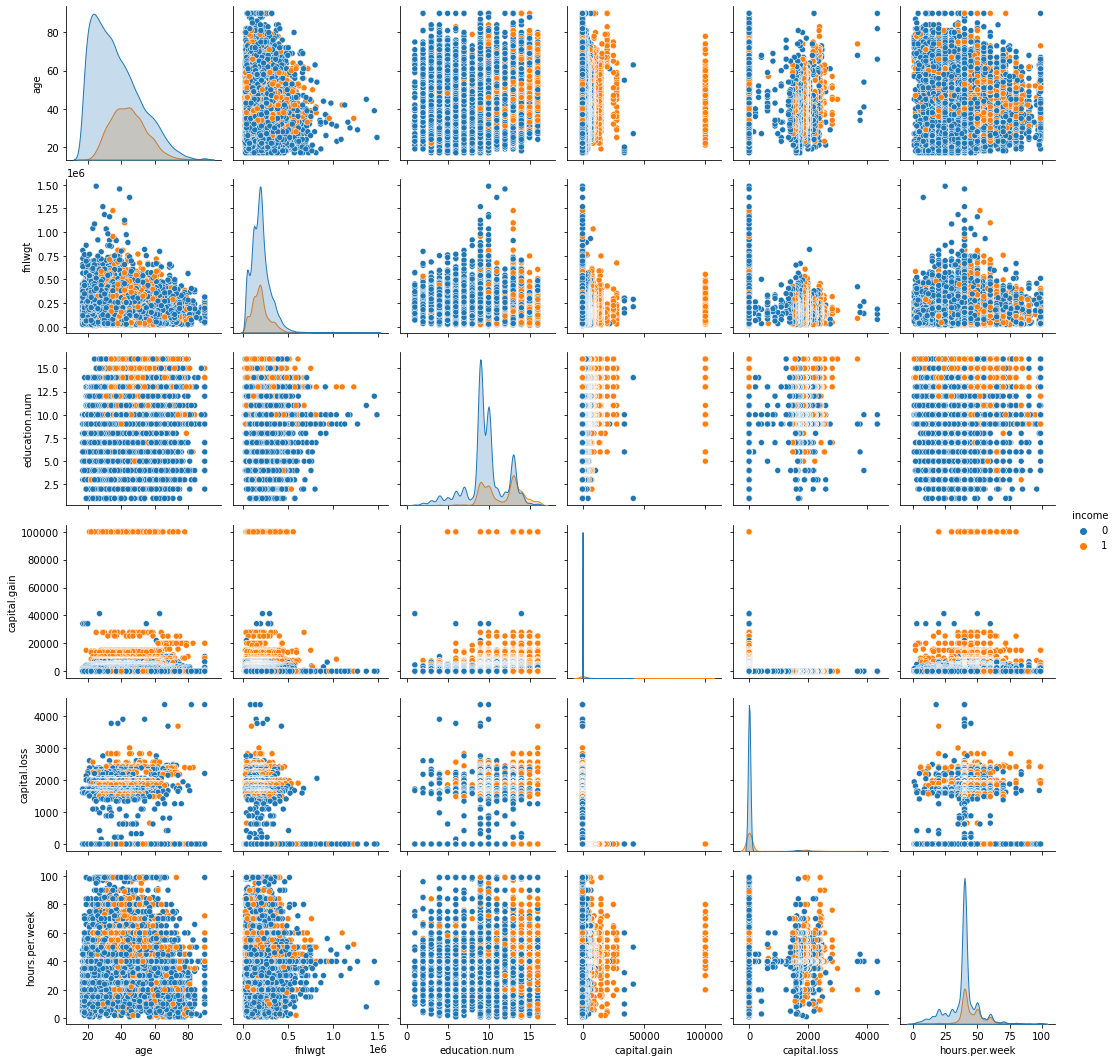

In [59]:
sns.pairplot(df,diag_kind='kde'  ,hue='income')

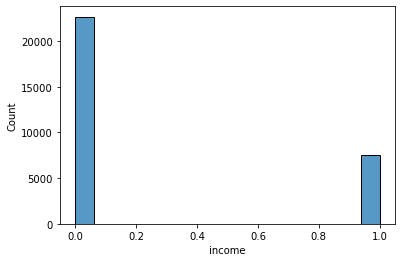

In [34]:
sns.histplot(df.income);

The Mean age is :


38.579023078366376

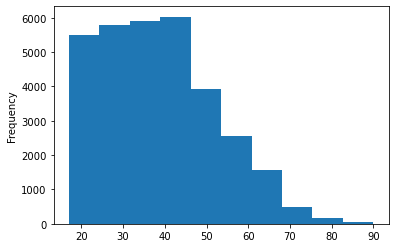

In [60]:
df.age.plot.hist()

print ('The Mean age is :' )
df.age.mean()


<AxesSubplot:xlabel='workclass', ylabel='count'>

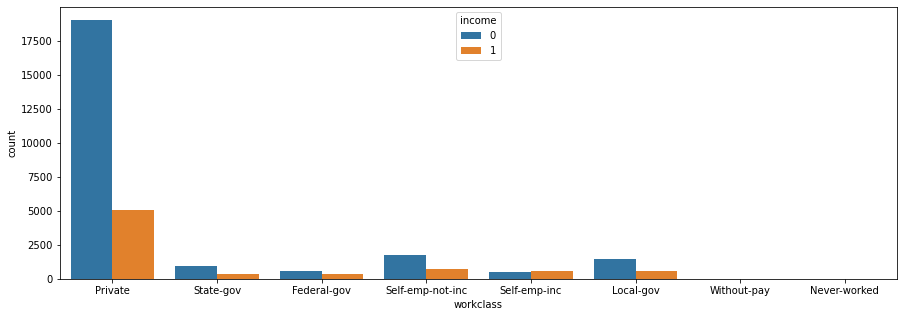

In [61]:
plt.figure(figsize=(15,5))
sns.countplot( x=df['workclass'], hue=df['income'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

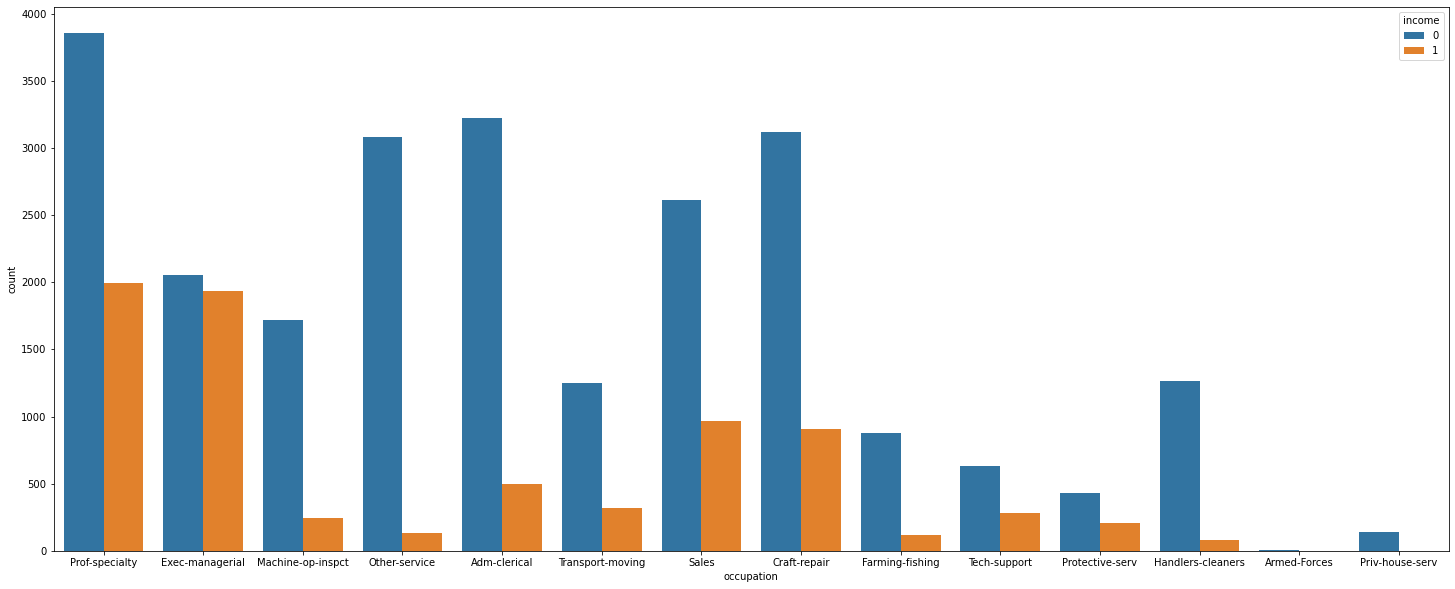

In [62]:
plt.figure(figsize=(25,10))
sns.countplot( x=df['occupation'], hue=df['income'])

<AxesSubplot:xlabel='income', ylabel='age'>

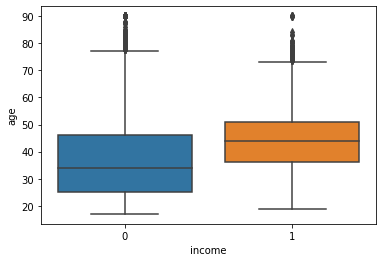

In [63]:
sns.boxplot(x=df.income, y=df.age)


<AxesSubplot:xlabel='income', ylabel='age'>

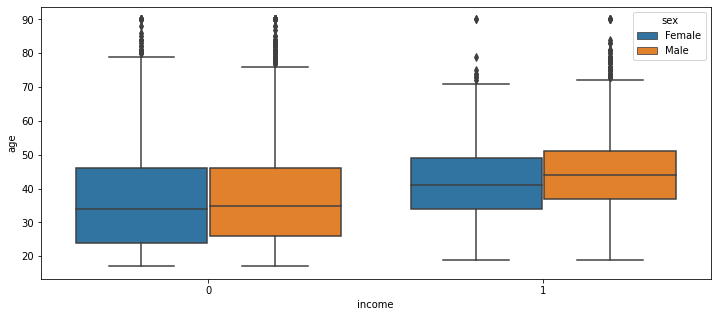

In [64]:
plt.figure(figsize=(12,5))

sns.boxplot(x=df.income, y=df.age, hue=df.sex)


In [65]:
df['sex'].value_counts()

Male      21370
Female    10608
Name: sex, dtype: int64

In [67]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

<AxesSubplot:xlabel='marital.status', ylabel='count'>

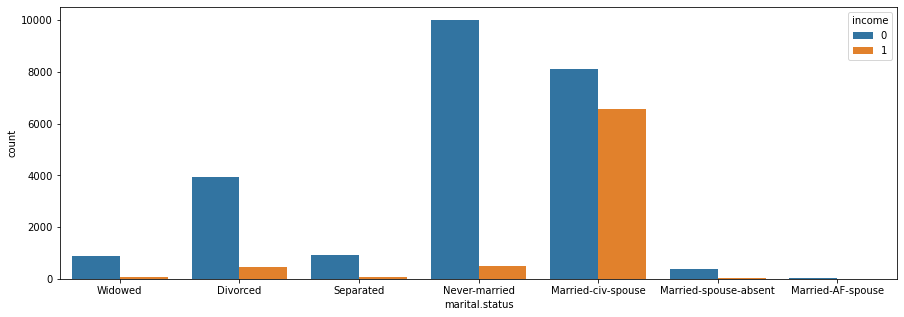

In [70]:
plt.figure(figsize=(15,5))

sns.countplot(x=df['marital.status'], hue=df.income)

<AxesSubplot:xlabel='education', ylabel='count'>

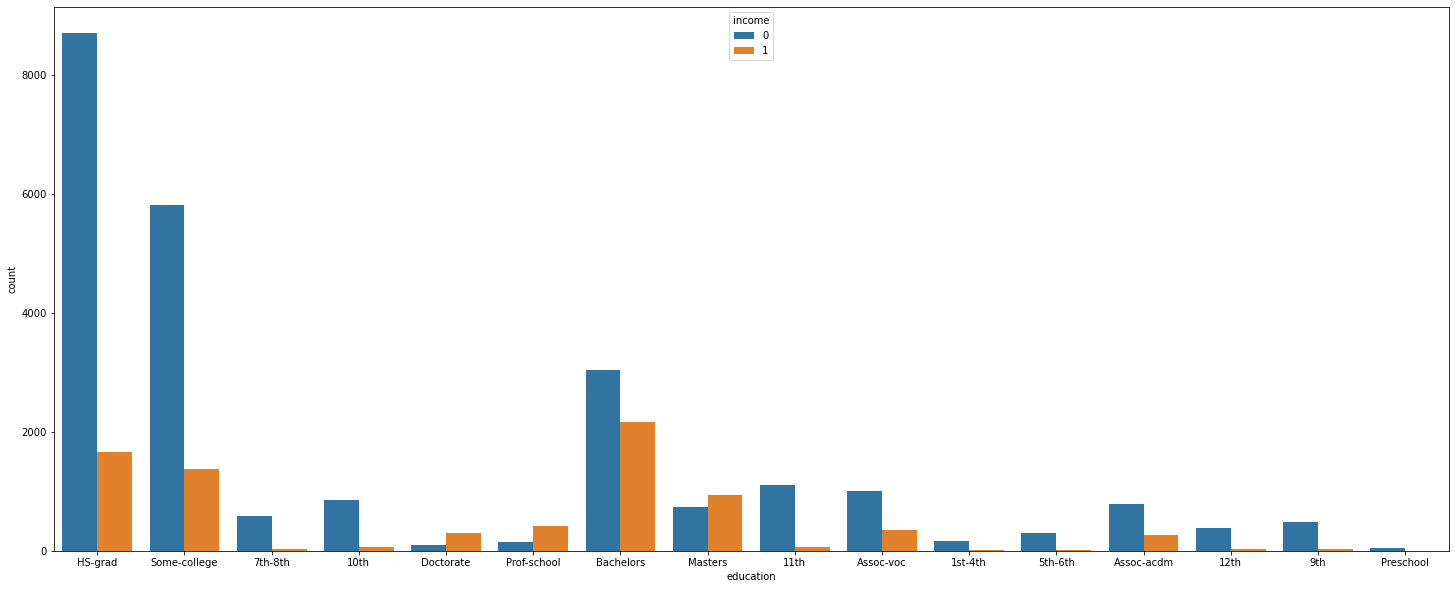

In [71]:
plt.figure(figsize=(25,10))

sns.countplot(x=df['education'], hue=df['income'] )


As the number of years spent in school grows, so does household income.

In [72]:
df['education'].value_counts()


HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: education, dtype: int64

In [74]:
df['education.num'].value_counts()

9     10368
10     7187
13     5210
14     1674
11     1366
7      1167
12     1055
6       921
4       627
15      559
5       506
8       417
16      390
3       318
2       163
1        50
Name: education.num, dtype: int64

Education and Education.num is giving us the same result so we will use education.num since its a numerical 

<AxesSubplot:xlabel='race', ylabel='count'>

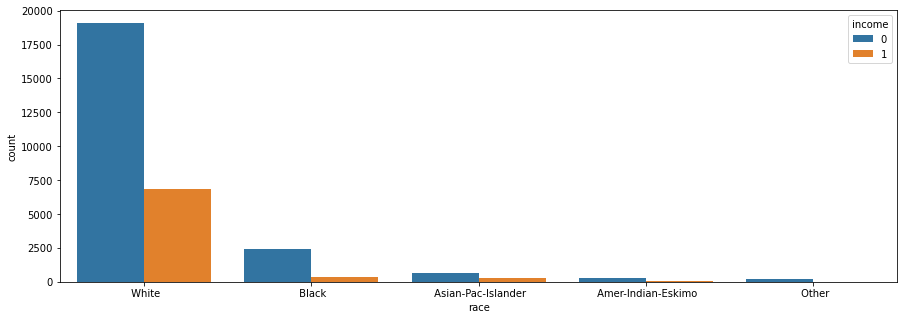

In [199]:
 plt.figure(figsize=(15,5))
sns.countplot(x=df['race'], hue=df['income'])


In [75]:
df['race'].value_counts()

White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: race, dtype: int64

<AxesSubplot:xlabel='hours.per.week', ylabel='count'>

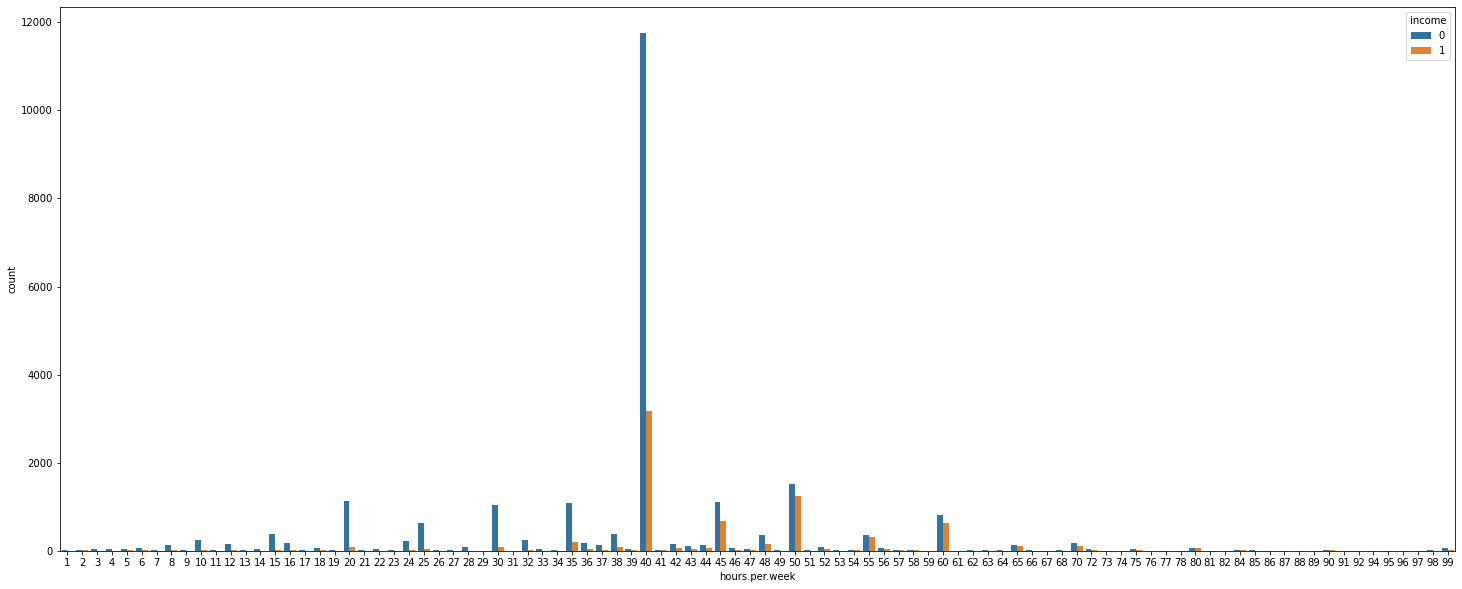

In [76]:
 plt.figure(figsize=(25,10))
sns.countplot(x=df['hours.per.week'], hue=df['income'])

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

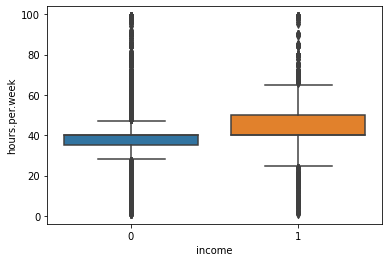

In [77]:
sns.boxplot(x=df.income, y=df['hours.per.week'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

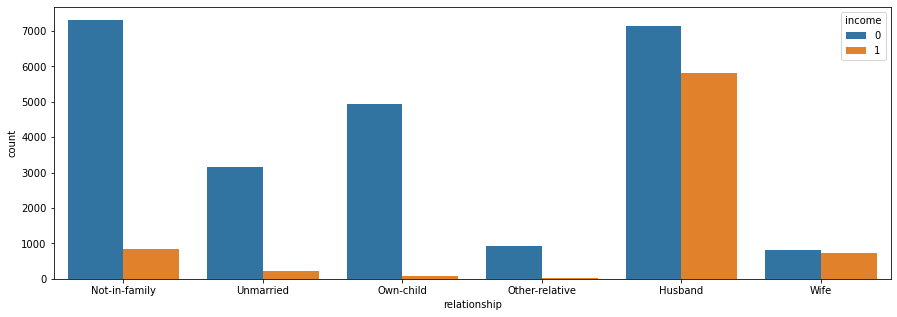

In [78]:
 plt.figure(figsize=(15,5))
sns.countplot(x=df['relationship'], hue=df['income'])

38.579023078366376

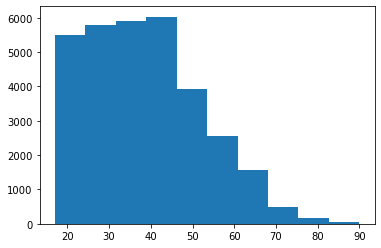

In [79]:
plt.hist(df["age"])
df.age.mean()

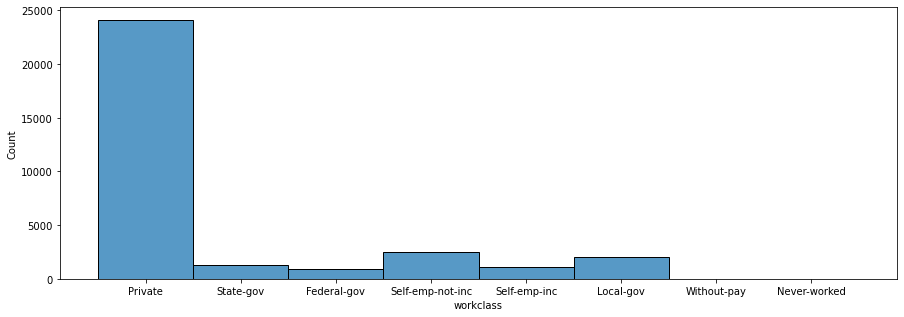

In [81]:
 plt.figure(figsize=(15,5))

sns.histplot(df.workclass ,bins=8);


# Modeling

using label encoder to change income to numerical value to use 

In [13]:
#from sklearn.preprocessing import LabelEncoder
#finaldf = df.copy()
#le = LabelEncoder()

#feature = ["income"]


#for col in feature:
 #   finaldf[col] = le.fit_transform(df[col])

In [82]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df = df.apply(enc.fit_transform)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2623,11,8,6,9,1,4,0,0,91,39,38,0
1,65,3,6449,11,8,6,3,1,4,0,0,91,17,38,0
2,49,3,11055,15,9,6,9,4,2,0,0,91,39,38,0
3,37,3,6936,5,3,0,6,4,4,0,0,90,39,38,0
4,24,3,16659,15,9,5,9,3,4,0,0,90,39,38,0


In [83]:

X = df.drop(['income','education'], axis=1)
Y = df['income']

In [84]:
X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,72,3,2623,8,6,9,1,4,0,0,91,39,38
1,65,3,6449,8,6,3,1,4,0,0,91,17,38
2,49,3,11055,9,6,9,4,2,0,0,91,39,38
3,37,3,6936,3,0,6,4,4,0,0,90,39,38
4,24,3,16659,9,5,9,3,4,0,0,90,39,38


In [85]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# Split Data

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,  random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# usning random forest algorithm


In [89]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train)
print(acc_random_forest)



0.9999609100148542


# Model evaluation 


In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_prediction))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4853
           1       0.75      0.61      0.67      1543

    accuracy                           0.86      6396
   macro avg       0.82      0.77      0.79      6396
weighted avg       0.85      0.86      0.85      6396



# Using Logistic Regression algorithm


In [91]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = logreg.score(X_train, Y_train) 



from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8217636022514071

# Model evaluation 


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4853
           1       0.71      0.45      0.55      1543

    accuracy                           0.82      6396
   macro avg       0.77      0.69      0.72      6396
weighted avg       0.81      0.82      0.81      6396



## random forest algorithm is the best module to use for this problem